<a href="https://colab.research.google.com/github/udaykiranreddykondreddy/Code-for-learn-machinelearning/blob/master/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://drive.google.com/uc?export=view&id=1xZggtEjnrMp9QBm_4q5RJIfJyfSoSJ9p" height="150" align="left">
<h1>&nbsp;<a href="https://instagram.com/learn.machinelearning">Learn.MachineLearning</a></h1>
<h2>&nbsp;Gradient descent</h2>
<h3><b>&nbsp;part 1</b></h3>



In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [0]:
data = pd.read_csv("data.csv")
data.columns =['x', 'y'] 

In [0]:
data.head()

,x,y
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


Text(0, 0.5, '$y$')

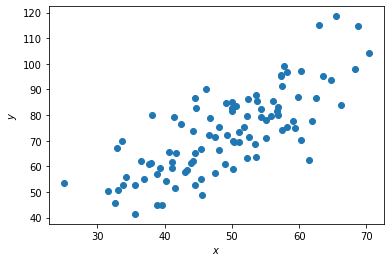

In [0]:
plt.scatter(data["x"],data["y"])
plt.xlabel("$x$")
plt.ylabel("$y$")

<h1> Linear regression </h1>

equation of line \begin{equation} \ y = mx + b \end{equation} 


\begin{equation} \ costfunction = (1/n) * \sum_{i=1}^{n}(y(\theta^{(i)}) - y{(i)})^2 \end{equation} 
- n = total no of samples
- y = ground truth label
- y0 = predicted value

we need to find **m** and **b** values which minimizes the cost function

Text(0, 0.5, '$y$')

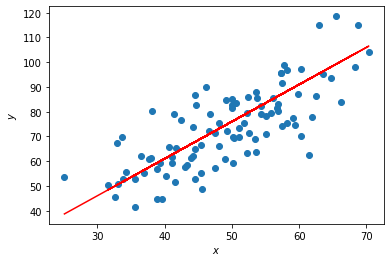

In [0]:
plt.scatter(data["x"],data["y"])
plt.plot(data["x"], 1.5*data["x"]+1, '-r', label='y=1.5x+1')
plt.xlabel("$x$")
plt.ylabel("$y$")

looks like \begin{equation} \ y = x^2 \end{equation} 


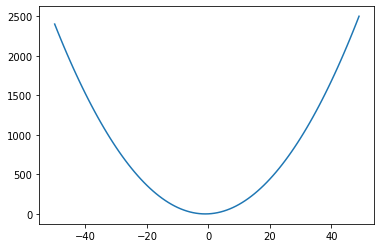

In [0]:
import matplotlib.pyplot as plt

a=[]
b=[]
# y=0
# x=-50

for x in range(-50,50,1):
    y=x**2+2*x+2
    a.append(x)
    b.append(y)
    #x= x+1

fig= plt.figure()
axes=fig.add_subplot(111)
axes.plot(a,b)
plt.show()

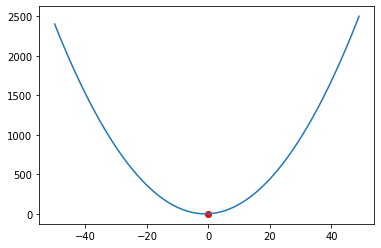

In [0]:
import matplotlib.pyplot as plt
fig= plt.figure()
axes=fig.add_subplot(111)
plt.plot(0, 0,"r.",markersize=12)
axes.plot(a,b)
plt.show()

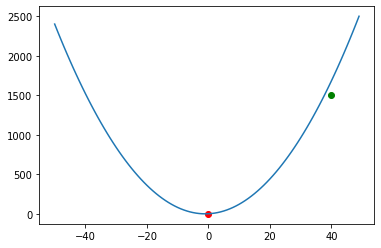

In [0]:
import matplotlib.pyplot as plt

a=[]
b=[]
# y=0
# x=-50

for x in range(-50,50,1):
    y=x**2+2*x+2
    a.append(x)
    b.append(y)
    #x= x+1

fig= plt.figure()
axes=fig.add_subplot(111)
plt.plot(40, 1500,"g.",markersize=12)
plt.plot(0, 0,"r.",markersize=12)
axes.plot(a,b)
plt.show()

**We wiil solving it using Gradiet descent**

<b>Cost</b>
\begin{equation}
J(\theta) = 1/n \sum_{i=1}^{n} (m*x^{(i)}+b - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/n\sum_{i=1}^{n}(m*x^{(i)}+b - y^{(i)})^2
\end{equation}

\begin{equation}
\frac{\partial J}{\partial m} = 2 * (m*x^{(i)}+b - y^{(i)}) * \frac{\partial J}{\partial m}(m*x^{(i)}+b - y^{(i)})
\end{equation}
\begin{equation}
\frac{\partial J}{\partial m} = 2 * (m*x^{(i)}+b - y^{(i)}) * x^{(i)}
\end{equation}


\begin{equation}
\frac{\partial J}{\partial b} = 2 * (m*x^{(i)}+b - y^{(i)}) * \frac{\partial J}{\partial b}(m*x^{(i)}+b - y^{(i)})
\end{equation}
\begin{equation}
\frac{\partial J}{\partial b} = 2 * (m*x^{(i)}+b - y^{(i)}) * 1
\end{equation}

\begin{equation}
m^{(1)} = m^{(0)} - 2 * (m*x^{(i)}+b - y^{(i)}) * x^{(i)} * learning rate
\end{equation}

\begin{equation}
b^{(1)} = b^{(0)} - 2 * (m*x^{(i)}+b - y^{(i)}) * 1 * learning rate
\end{equation}

In [0]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.00001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 10000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10000 iterations b = 0.08893631736009773, m = 1.4777440891710403, error = 112.61481023700442


Text(0, 0.5, '$y$')

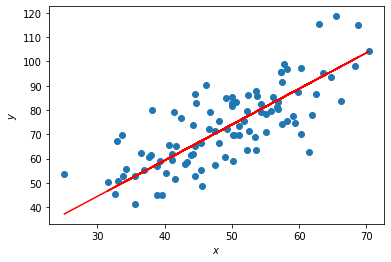

In [0]:
plt.scatter(data["x"],data["y"])
plt.plot(data["x"], 1.4777440891710403*data["x"]+0.08893631736009773, '-r', label='y=1.4777440851894448x+0.08893651993741346')
plt.xlabel("$x$")
plt.ylabel("$y$")